## **SOBRE OS DADOS**

Este notebook foi construído baseando-se no [livro do Aurélien Géron](https://www.amazon.com.br/M%C3%A3os-obra-aprendizado-Scikit-Learn-inteligentes/dp/8550815489/ref=asc_df_8550815489/?tag=googleshopp00-20&linkCode=df0&hvadid=379715964603&hvpos=&hvnetw=g&hvrand=6748800514414021109&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1032060&hvtargid=pla-1390910077420&psc=1) e também através do notebook do Aurélien Géron, [disponível aqui](https://github.com/ageron/handson-ml).


É importante também saber **como** esse dataset foi **construído**. 

Primeiro, usou-se dados brutos do censo de 1990 da Califórnia. 

* Calculou-se os centróides de cada quarteirão da Califórnia, medido em latitude e longitude.

* Foram excluídos todos os quarteirões que tinha entradas faltantes.

As características (**features**) são as seguintes:


1. longitude: longitude do centro do quarteirão;

2. latitude: latitude do centro do quarteirão;

3. housing_median_age: idade mediana de uma casa dentro de um quarteirão; 
4. total_rooms: número total de quartos em uma quadra;

5. total_bedrooms: número total de quartos em uma quadra;

6. population: número total de pessoas residentes em um quarteirão;

7. households: número total de famílias em um quarteirão;

8. median_income: renda mediana para famílias em um quarteirão de casas (medida em dezenas de milhares de dólares);

9. median_house_value : valor médio da casa para famílias em um bloco (medido em dólares americanos);

10. ocean_proximity: localização da quadra em relação ao mar/oceano.

As informações são do [artigo](https://www.sciencedirect.com/science/article/abs/pii/S016771529600140X).

## **IMPORTANDO AS BIBLIOTECAS**

Aqui estou importando as bibliotecas que serão empregadas na resolução do problema que consiste na construção de um algoritmo que terá a função de calcular o preço das casas com base nas caracteristicas que serão inputadas nas variáveis de entrada.</p>
Vale ressaltar que para este problema estarei utilizando um modelo de regressão linear

In [124]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

from sklearn.model_selection import cross_val_score


In [6]:
# Com finalidade de garantir que o experimento possa ser reproduzido e contribuir com a estabilidade do mesmo
# estou definindo um SEED que será passado para o modelo
seed = 232
np.random.seed(seed)

## **IMPORTANDO OS DADOS**

Agora que já sabemos um pouco sobre como os dados foram obtidos, é hora de importá-los para iniciar a fase de exploração. O objetivo aqui é entender um pouco mais sobre como estão distribuidos, quais suas caracteristicas e tipos para ver o que será feito na etapa de pré-processamento. 

In [3]:
housing = pd.read_csv('housing.csv')

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Abaixo estou utilizando um sample para evitar pegar dados ordenados. Com isso consigo ter uma visão mais geral dos dados. 

In [13]:
housing.sample(10, random_state=seed)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2226,-119.78,36.86,10.0,2902.0,363.0,1200.0,363.0,8.3608,187300.0,INLAND
9085,-118.17,34.67,5.0,8352.0,1555.0,3723.0,1389.0,4.5659,140300.0,INLAND
16083,-122.48,37.73,47.0,2382.0,392.0,867.0,376.0,5.2598,371500.0,NEAR OCEAN
12242,-116.97,33.75,22.0,3740.0,965.0,2011.0,824.0,1.3039,77500.0,INLAND
785,-122.11,37.64,8.0,3592.0,849.0,1907.0,746.0,3.6708,197900.0,NEAR BAY
10697,-117.75,33.61,17.0,2499.0,566.0,781.0,522.0,3.1779,186500.0,<1H OCEAN
9439,-120.07,37.34,16.0,1667.0,372.0,762.0,283.0,1.7500,87500.0,INLAND
16096,-122.50,37.76,46.0,1491.0,285.0,841.0,306.0,4.5329,278800.0,NEAR OCEAN
2858,-118.94,35.39,27.0,3074.0,452.0,1223.0,452.0,5.4592,139100.0,INLAND
15310,-117.38,33.14,14.0,5039.0,1373.0,1298.0,696.0,3.2090,313300.0,NEAR OCEAN


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Já deu para notar a variável "ocean_proximity" não é do tipo numérica. Todo o restante dos dados é numérico. <br>

Outra caracteristica interessante deste dataset é que o campo "total_bedrooms" possui dados faltantes. 

Como temos uma variável categórica aqui, uma das coisas que gosto de vazer é contar quantos tipos de categoria estão contidas na base.

In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### **Informações Estatísticas sobre o a base de dados**

Através do método Describe podemos rapidamente obter uma série de dados estatisticas sobre a base de dados que estamos trabalhando. 

Através deste método, podemos facilmenete identificar dados inconsistentes em nossa base. 

Particularmente gosto do transpor a tabela. Acho que simplifica a minha visualização. 

In [16]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


Outra coisa que pode ajudar a entender melhor os dados é plotar gráficos de distribuição. </p>
Com eles podemos facimente identificar várias caracteristicas dos dados o que pode nos ajudar na etapa de pré-processamento.


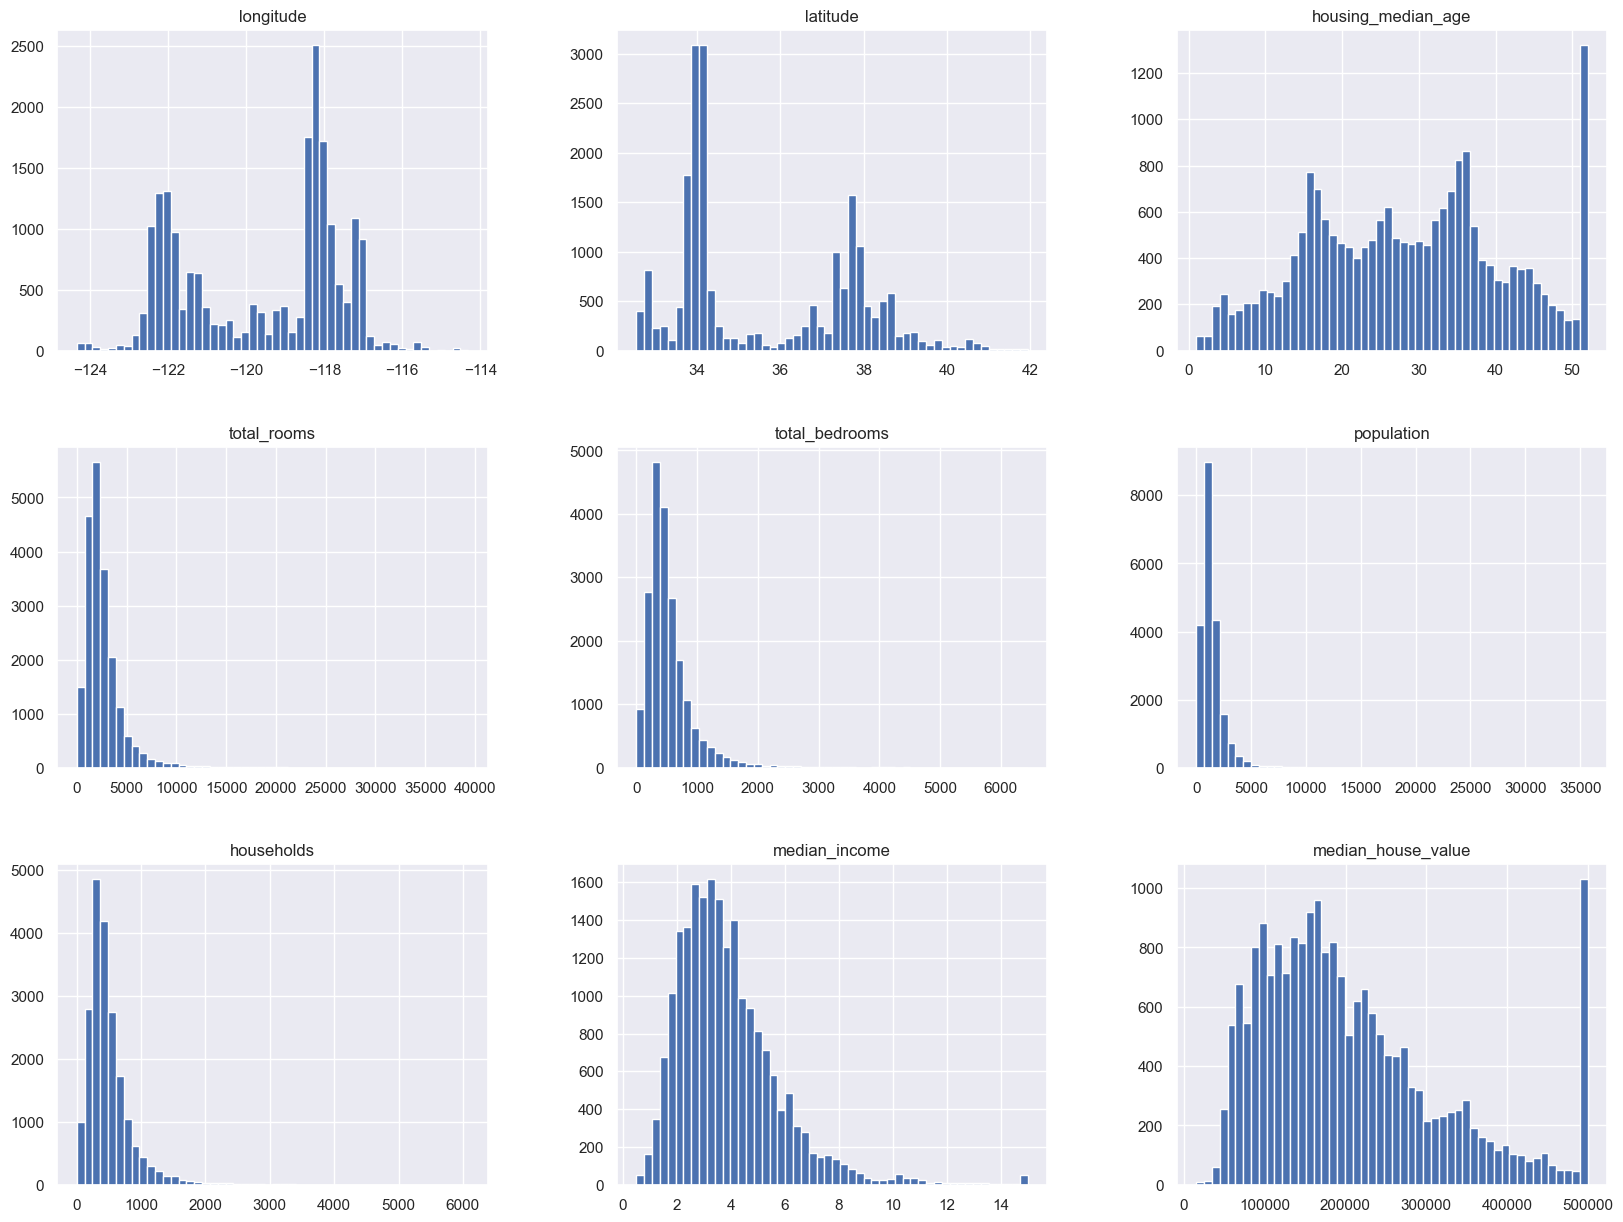

In [12]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

## **Separando o Conjunto de Dados**
Se quisermos utilizar um conjunto de teste para realizar uma estimativa "não enviesada" do modelo final é importante já separarmos o conjunto de treino e teste desde já.

Uma coisa muito legal do método train_test_split do scikit-learn é que ele alem de fazer a divisão entre teste e treino dos dados, ainda faz o embaralhamento.

<font color='red'>É importante que os dados sejam embaralhados pois é comum que exista algum tipo de ordenação nos dados, de forma que se você não embaralhar os dados estará introduzindo tendencias ou vieses que não existem nos dados reais. </font>

In [17]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=seed)

Essa divisão no conjunto de dados é até então puramente aleatória. Será que esse tipo de divisão é a mais indicada?

Vejamos novamente as medidas resumo da renda mediana:

In [23]:
round(housing["median_income"].describe()[['std','mean']],2)

std     1.90
mean    3.87
Name: median_income, dtype: float64

Lembrando que "median_income" é a renda mediana para famílias em um quarteirão de casas (medida em dezenas de milhares de dólares). Nesse caso, a **maior parte dos quarteirões tem renda mediana entre 20 mil e 58 mil dólares***.


***Observação:** mean ~= 3.87, corresponde a uma renda anual mediana de 38 mil e 700 dólares. Neste caso, calculando o intervalo [mean - std, mean + std], em um modelo gaussiano teríamos aproxidamente 68% da distribuição dos dados. Daí a afirmação.

Vamos agora fazer uma estratificação da renda, pois é importante ter um número suficiente de instâncias para cada estrato no conjunto de dados (treino e testes), do contrário pode ser que os nossos dados fiquem enviasados, não representando adequadamente a população. Em uma amostra suficientemente grande isso não seria um problema.

Dependendo do problema, a questão da discussão do tipo de amostragem deve ser discutida com um **estatístico**.

Vamos supor que tenhamos feito esse processo, de discutir com um estatístico a respeito do problema e foi nos informado que é importante separar a renda dos quarteirões em estratos para abordar o problema adequadamente.

Vamos dividir a renda em 5 estratos, de 15 em 15 mil doláres. Não há nenhuma mágica nessa escolha, senão a questão da facilidade. O correto seria, mais uma vez, usar informações sociais discutidas com o estatístico

Faremos isso criando uma nova feature no nosso dataset. Esse processo de criar novas categorias a partir do conhecimento do problema é chamado de **feature engineering** e abordaremos melhor mais à frente no nosso projeto.

<AxesSubplot: >

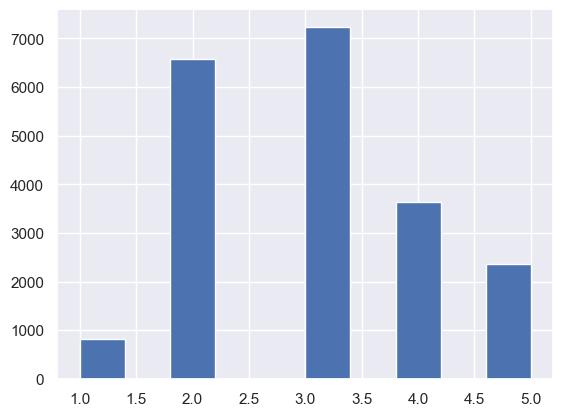

In [24]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist()

In [25]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [27]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Acabamos de criar novos conjuntos de treino e de teste, que chamamos de <font color='red'>strat_train_set </font> e <font color='green'>strat_test_set</font>.

 Estes conjuntos devem respeitar a estratificação que introduzimos baseada em "median_income" representado na nova variável categórica "income_cat".

 Vejamos se funcionou:

In [28]:
#Proporção de cada categoria em strat_test_set
strat_test_set["income_cat"].value_counts() / len(strat_test_set) 

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [29]:
#Proporção de cada categoria em housing
housing["income_cat"].value_counts() / len(housing) 

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

Podemos agora comparar com a <font color='green'> amostragem aleatória </font>:

In [30]:
#Função para calcular as proporções das categorias da característica "income_cat"
def income_cat_proportions(data): 
    return data["income_cat"].value_counts() / len(data)

Agora vamos gerar novamente conjunto de teste e treino, mas usando amostragem aleatória.

In [31]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=seed)

Vamos criar o nosso novo dataframe e visualizar os resultados:

In [32]:
compare_props = pd.DataFrame({
    "Geral": income_cat_proportions(housing),
    "Estratificado": income_cat_proportions(strat_test_set),
    "Aleatorio": income_cat_proportions(test_set),
}).sort_index()

compare_props["Aleatório %erro"] = 100 * compare_props["Aleatorio"] / compare_props["Geral"] - 100
compare_props["Estratificado %erro"] = 100 * compare_props["Estratificado"] / compare_props["Geral"] - 100

compare_props

,Geral,Estratificado,Aleatorio,Aleatório %erro,Estratificado %erro
1,0.039826,0.039971,0.044816,12.530414,0.364964
2,0.318847,0.318798,0.323643,1.504331,-0.015195
3,0.350581,0.350533,0.351744,0.331675,-0.013820
4,0.176308,0.176357,0.168605,-4.369332,0.027480
5,0.114438,0.114341,0.111192,-2.836579,-0.084674


Não podemos esquecer de <font color='red'>remover</font> o atributo "income_cat" dos conjuntos strat_train_set e strat_test_set. Na verdade, ele era apenas um intermediário, afinal de contas as informações dessa caracaterísticas já estão presentes em "median_income".

In [33]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### **VISUALIZAÇÃO DA ESTRUTURA DE DADOS**

Vamos agora visualizar os nossos dados. Precisamos ter certeza que não vamos visualizar dados do conjunto de teste, para evitar enviesamento de conclusões. 

De um ponto de vista mais técnico, devemos evitar o **snooping bias**.

In [34]:
housing = strat_train_set.copy() 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

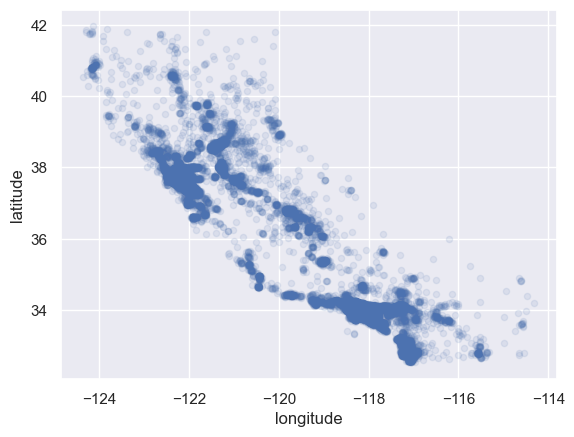

In [36]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

No código a seguir o parâmetro "s" significa "size", tamanho em inglês. Escolhendo "s" como sendo a característica população, quanto maior o disco representa uma população maior.

O parâmetro "c" significa "color", ou cor. Esse é na verdade o que queremos saber!

O paramêtro colorbar = True indica que queremos visualizar a barra lateral informando as intensidades da cor, ou seja, do parêmetro "c".

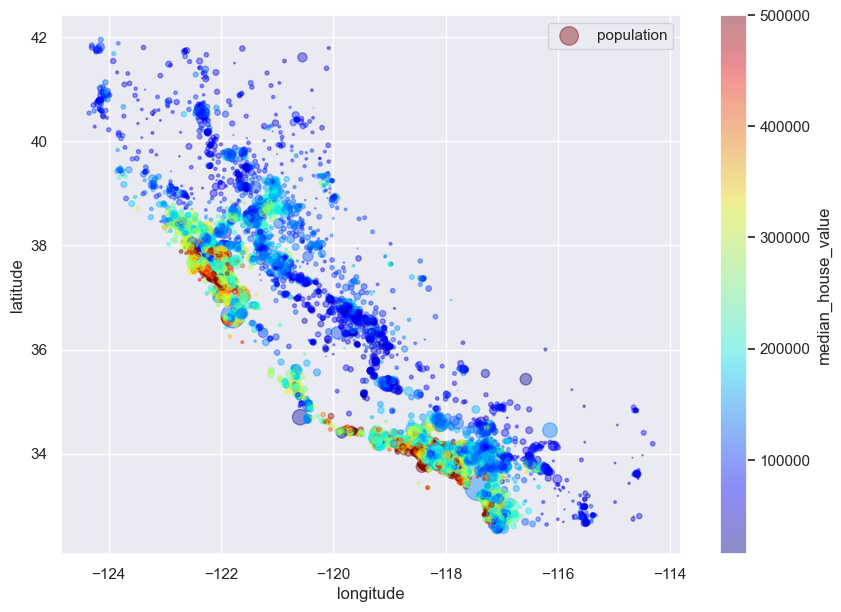

In [38]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False) #sharex=false é só pra corrigir um bug de display https://github.com/pandas-dev/pandas/issues/10611
plt.legend();

A visulização dos dados indicam que regiões litorâneas tendem a possuir um valor mais alto. Talevz a densidade populacional também possa ser algo relevante.

Vamos então investigar essas hipóteses através da correleção estatística:

In [39]:
corr_matrix = housing.corr()

In [44]:
corr_matrix["median_house_value"].sort_values(ascending=False).drop(['median_house_value'])

median_income         0.688639
total_rooms           0.136009
housing_median_age    0.103370
households            0.065334
total_bedrooms        0.049931
population           -0.025707
longitude            -0.049204
latitude             -0.140768
Name: median_house_value, dtype: float64

É conveniente usar o scatter_matrix do pandas. Essa função plota cada característica em relação a outra. No nosso exemplo, teríamos 121 possibilidades.

Mas claro que não faremos isso e vamos então selecionar algumas que parecem ser mais significativas:

**Dica**: Vamos aproveitar e revisar alguns [conceitos básicos de estatística](http://geam.paginas.ufsc.br/files/2020/02/Estatistica_Basica.pdf).


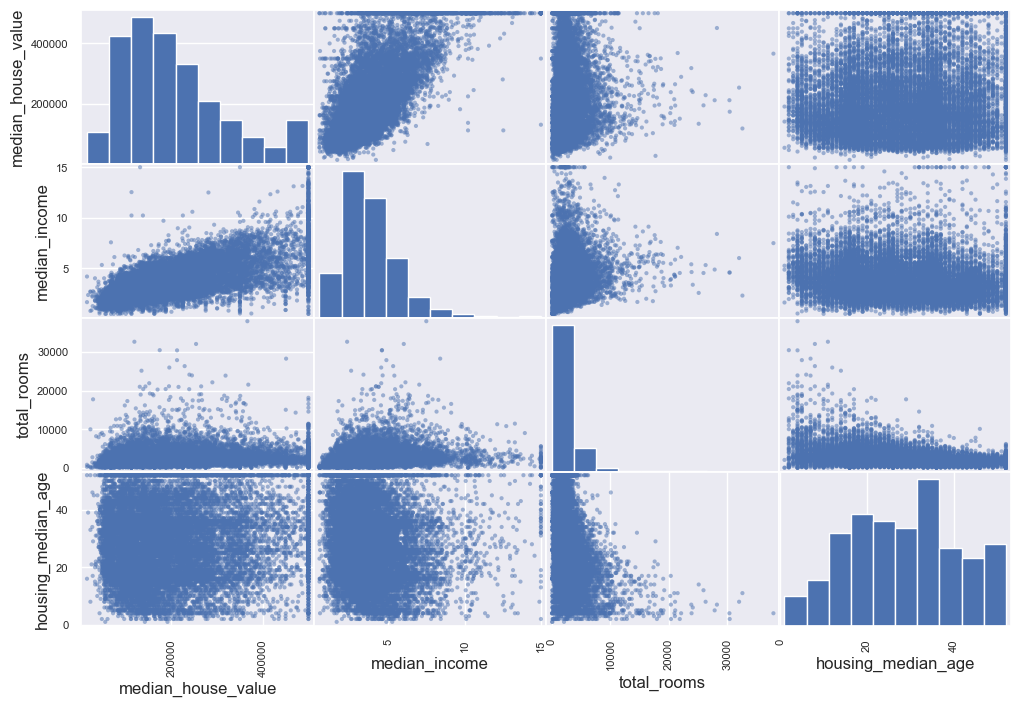

In [46]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8));

**OBS:** Na diagonal principal da plotagem anterior não temos atributo v.s. atributo, mas sim o histograma da característica.

Vimos antes que a característica que tinha maior correlação com o valor mediano de casas em um bairro era o salário mediano. Então vamos plotar para estudar a relação entre ambos:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


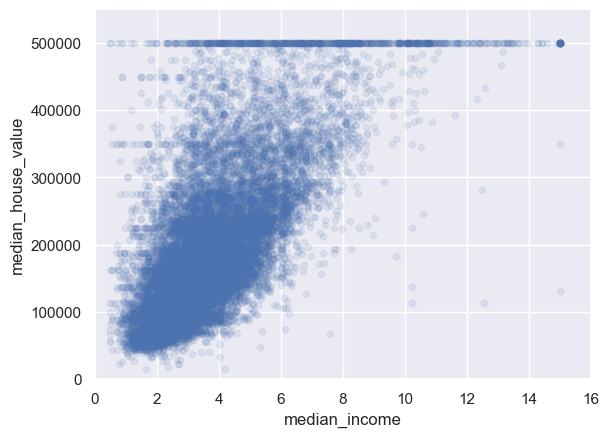

In [48]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000]);

Informações desta plotagem: 

1.   Correlação é forte;

2.   Há um valor limiar de 500.000 para os valores (medianos) das casas. Por quê?

3. Há também outras linhas horizontais. Por que elas são importantes?

Uma abordagem possível seria excluir os dados correspondentes a esses casos.

## **Feature Engineering**

Além das colunas que o conjunto de dados nos oferece, podemos tentar construir novas características <font color = "red">**construídas de maneiras não linear**</font> com as características existentes.

De maneira geral, essa etapa requer conhecimento específico da área na qual se esta trabalhando. Daí a importância da presença de um especialista no assunto para auxiliar no projeto. 

A seguir, vamos construir algumas novas features que são mais ou menos lógicas.

In [49]:
#Nova feature: Número de cômodos por familia (média)
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

#Nova feature: quartos/cômodos
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

#Nova feature: população/agregado familiar
housing["population_per_household"]=housing["population"]/housing["households"]

Vejamos agora a matriz de correlação de housing:

In [52]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False).drop(["median_house_value"])

median_income               0.688639
rooms_per_household         0.149653
total_rooms                 0.136009
housing_median_age          0.103370
households                  0.065334
total_bedrooms              0.049931
population_per_household   -0.020385
population                 -0.025707
longitude                  -0.049204
latitude                   -0.140768
bedrooms_per_room          -0.253781
Name: median_house_value, dtype: float64

Aparentemente, casas com uma baixa proporção de quartos por cômodos tendem a ser mais caras. O número de cômodos por família é muito mais informativo que o número total de quartos em um quarteirão.

Vejamos o gráfico:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


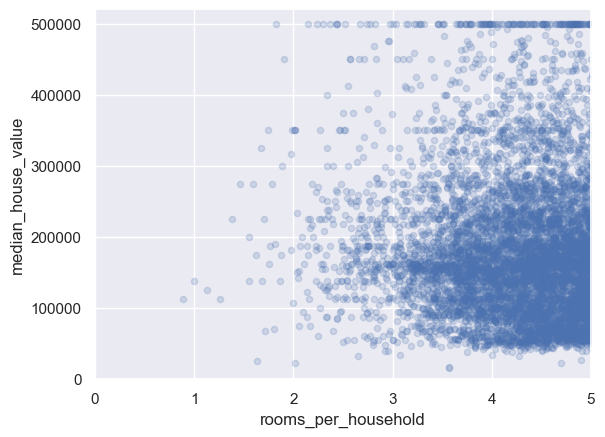

In [54]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show();

Vamos ver novamente as medidas resumos considerando as novas features!

In [55]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16343.000000,16512.00000,16512.000000,16512.000000,16512.000000,16512.000000,16343.000000,16512.000000
mean,-119.575359,35.640453,28.647166,2625.912791,536.790247,1424.82110,498.673752,3.869341,206132.803961,5.430942,0.213159,3.067460
std,2.005055,2.135126,12.574045,2142.179650,418.041116,1129.31181,379.076474,1.907310,114949.470125,2.574421,0.057989,10.630454
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.00000,1.000000,0.499900,14999.000000,0.888889,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1446.000000,295.000000,788.00000,279.000000,2.559725,119400.000000,4.436763,0.175383,2.432045
50%,-118.500000,34.260000,29.000000,2128.000000,435.000000,1166.00000,410.000000,3.533300,179300.000000,5.229575,0.203193,2.819195
75%,-118.010000,37.720000,37.000000,3141.000000,648.000000,1737.00000,606.000000,4.741375,264025.000000,6.046826,0.239901,3.285972
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.00000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## **PRÉ PROCESSAMENTO**

Agora que já fizemos uma boa exploração dos dados que temos em mente, chegou a hora de começarmos a preparar os dadoss para os modelos de machine learning.

Precisamos incialmente retirar os rótulos do conjunto <fon color='blue'> strat_train_set </font> (mais a frente ficará claro).

Para isso, vamos usar o método drop:

In [56]:
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()

**OBS:** Ao longo desta seção estaremos chamando as features de treinamento como "housing". Atenção neste ponto para não confundir com o dataset inteiro. Isto é,
 tudo o que nos faremos aqui será feito somento no conjunto de treinamento!

A partir de agora vamos partir para etapa de <font color='green'>**limpeza de dados!**</font>

Vamos começar verificando se temos dados falantes:

In [57]:
#housing.isnull().any(axis=1) verifica quais linhas possuem alguma célula null
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head() 
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12809,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND
15890,-122.38,37.73,40.0,543.0,NaN,259.0,89.0,2.2167,NEAR BAY
19332,-122.91,38.46,18.0,2021.0,NaN,912.0,329.0,4.5000,<1H OCEAN
3958,-118.59,34.20,21.0,1789.0,NaN,2300.0,677.0,2.7540,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND


In [58]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12809,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND
15890,-122.38,37.73,40.0,543.0,NaN,259.0,89.0,2.2167,NEAR BAY
19332,-122.91,38.46,18.0,2021.0,NaN,912.0,329.0,4.5000,<1H OCEAN
3958,-118.59,34.20,21.0,1789.0,NaN,2300.0,677.0,2.7540,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND


Possuímos basicamente três abordagens possíveis para lidar com os dados faltantes:

1. Excluir os quarteirões com dados faltantes;

2. Excluir toda coluna de total_bedrooms, já que é o único atributo que apresenta dados faltantes;

3. Definir algum valor para substituir total_bedrooms.

In [60]:
# opção 1
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [61]:
# opção 2
sample_incomplete_rows.drop("total_bedrooms", axis=1)       

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
12809,-121.47,38.61,31.0,1072.0,781.0,281.0,1.6563,INLAND
15890,-122.38,37.73,40.0,543.0,259.0,89.0,2.2167,NEAR BAY
19332,-122.91,38.46,18.0,2021.0,912.0,329.0,4.5000,<1H OCEAN
3958,-118.59,34.20,21.0,1789.0,2300.0,677.0,2.7540,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND


Opção 3: preenchendo com algum valor - nesse caso, usaremos a mediana.

Usaremos a mediana pois queremos alguma medida simples para corrigir os dados faltantes. Ao mesmo tempo, quando comparada com a média, a mediana é mais robusta a outliers o que a torna bastante interessante.

É claro que existem técnicas mais sofisticadas, por exemplo, há [livros](https://www.amazon.com.br/Statistical-Analysis-Missing-Probability-Statistics-ebook/dp/B07Q25CNSD/ref=sr_1_1?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=Statistical+Analysis+with+Missing+Data&qid=1610115793&s=digital-text&sr=1-1) inteiros sobre o assunto.

median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # opção 3
sample_incomplete_rows

Se escolhermos a opção 3, devemos calular a mediana (ou qualquer outra medida que seja justificável) no <font color="red">**conjunto de treinamento**</font> e usá-lo para preencher os valores faltantes neste, mas precisamos <font color="green">**salvar**</font> esse valor calculado.

Você precisar desse valor para mais tarde aplicar no conjunto de teste, que deverá ter seus dados faltantes corrigidos seguindo o mesmo parâmetro do conjunto de treino.

**AVISO**: No Scikit-Learn 0.20, a classe `sklearn.preprocessing.Imputer` 
foi substituida pela classe `sklearn.impute.SimpleImputer`. Então, é conviniente verificar qual versão o computador em questão está usando:

In [62]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
    print("Scikit-Learn 0.20+")
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
    print("Scikit-Learn antes do 0.20")

imputer = SimpleImputer(strategy="median")

Scikit-Learn 0.20+


Vamos novamente revisar o nosso dataset...

In [63]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5319,-118.42,34.06,52.0,1881.0,334.0,640.0,321.0,6.8710,<1H OCEAN
9940,-122.29,38.19,13.0,7065.0,1259.0,3864.0,1221.0,4.7472,NEAR BAY
3417,-118.42,34.28,29.0,1271.0,272.0,1338.0,266.0,4.1250,<1H OCEAN
9582,-120.49,37.32,10.0,1275.0,255.0,620.0,240.0,3.0263,INLAND
11444,-117.98,33.67,7.0,5664.0,1174.0,2493.0,1101.0,5.8252,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6845,-118.11,34.07,19.0,3215.0,907.0,3072.0,870.0,2.3393,<1H OCEAN
19356,-123.03,38.79,16.0,4047.0,769.0,1998.0,673.0,3.3750,<1H OCEAN
3967,-118.57,34.20,33.0,1759.0,311.0,943.0,315.0,5.2230,<1H OCEAN
4915,-118.27,34.00,48.0,1869.0,461.0,1834.0,441.0,1.7052,<1H OCEAN


Ainda temos a última coluna que não é numérica! 

A princípios, grande parte dos algoritmos de machine learning no computador preferem os dados representados numericamente!

In [64]:
# Dropando a coluna "ocean_proximity"
housing_num = housing.drop('ocean_proximity', axis=1)

Agora vamos ajudar o nosso objeto imputer com o nossos dados:

In [65]:
imputer.fit(housing_num) 

SimpleImputer(strategy='median')

Aqui, o imputer simplesmente calculou a mediana no conjunto de dados.

Vejamos algumas informações sobre o nosso objeto imputer:

In [67]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2128.    ,  435.    , 1166.    ,
        410.    ,    3.5333])

Vamos verificar que isto é, na verdade, a mesma coisa que calcular manualmente a mediana de cada atributo:

In [68]:
housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2128.    ,  435.    , 1166.    ,
        410.    ,    3.5333])

**Mas não seria apenas o atributo total_bedrooms que estava com valores faltantes?** 

Vamos precisar de todas as informações do imputer? Isto é, vamos precisar da mediana de todas as variáveis?

<font color='green'> **Não podemos, a princípio, afirmar que o mesmo padrão vai ser repetir na generalização do modelo!** </font>

Certo, mas e se dermos uma espiadinha no conjunto de testes?

Não devemos fazer isso por vários motivos. 

1. Corremos o risco de colocar vieses no nosso modelo (assumir que apenas "total_bedrooms" terá colunas com dados faltantes em todos os cenários possíveis é um deles);

2. Devemos ter sempre em mente que o conjunto de teste é no fundo uma simulação para testarmos o poder de generalização do algoritmo - devemos fazer todas as nossas análises e otimizações somente no conjunto de treinamento e então aplicar o modelo final uma única vez no conjunto de teste!



Vamos agora finalmente <font color = 'green'> transformar </font> o nosso conjunto de dados, aplicando, efetivamente, o valor calculado da mediana nos dados faltantes:

In [69]:
# numpy array
X = imputer.transform(housing_num) 

Vamos visualizar o conjunto X

In [70]:
X

array([[-1.1842e+02,  3.4060e+01,  5.2000e+01, ...,  6.4000e+02,
         3.2100e+02,  6.8710e+00],
       [-1.2229e+02,  3.8190e+01,  1.3000e+01, ...,  3.8640e+03,
         1.2210e+03,  4.7472e+00],
       [-1.1842e+02,  3.4280e+01,  2.9000e+01, ...,  1.3380e+03,
         2.6600e+02,  4.1250e+00],
       ...,
       [-1.1857e+02,  3.4200e+01,  3.3000e+01, ...,  9.4300e+02,
         3.1500e+02,  5.2230e+00],
       [-1.1827e+02,  3.4000e+01,  4.8000e+01, ...,  1.8340e+03,
         4.4100e+02,  1.7052e+00],
       [-1.2248e+02,  3.7760e+01,  4.8000e+01, ...,  1.4910e+03,
         6.0200e+02,  3.9758e+00]])

In [71]:
# Transformando este conjunto de dados em um DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index) 

In [72]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5319,-118.42,34.06,52.0,1881.0,334.0,640.0,321.0,6.8710
9940,-122.29,38.19,13.0,7065.0,1259.0,3864.0,1221.0,4.7472
3417,-118.42,34.28,29.0,1271.0,272.0,1338.0,266.0,4.1250
9582,-120.49,37.32,10.0,1275.0,255.0,620.0,240.0,3.0263
11444,-117.98,33.67,7.0,5664.0,1174.0,2493.0,1101.0,5.8252


Vejamos como é este dataframe:

In [73]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5319,-118.42,34.06,52.0,1881.0,334.0,640.0,321.0,6.8710
9940,-122.29,38.19,13.0,7065.0,1259.0,3864.0,1221.0,4.7472
3417,-118.42,34.28,29.0,1271.0,272.0,1338.0,266.0,4.1250
9582,-120.49,37.32,10.0,1275.0,255.0,620.0,240.0,3.0263
11444,-117.98,33.67,7.0,5664.0,1174.0,2493.0,1101.0,5.8252


Agora devemos tratar a variável categórica`ocean_proximity'!

Esta é uma variável muito importante no nosso problema: ela demonstrava uma boa correlação com o preço mediano das casas.

Vamos novamente visualizar os dados para relembrar:

In [74]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
5319,<1H OCEAN
9940,NEAR BAY
3417,<1H OCEAN
9582,INLAND
11444,<1H OCEAN
1106,INLAND
8098,NEAR OCEAN
17913,<1H OCEAN
466,NEAR BAY
9709,<1H OCEAN


Agora vamos usar um processo chamado de codificação. Vamos transformar as nossas variáveis categóricas em números!

<font color = 'green'>**Agora é um bom momento para olhar o noteobok de [apoio](https://github.com/edsonjunior14/mlcourse/blob/master/material_apoio_codificacao.ipynb) :**)</font>

**OBS**: O código a seguir é apenas devido a atualização da classe OrdinalEnconder()

In [75]:
try:
    from sklearn.preprocessing import OrdinalEncoder
    print("Scikit-Learn >= 2.0")
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20
    print("O teu Scikit-Learn tá antiguinho mô quirido")

Scikit-Learn >= 2.0


Na função a seguir, precisamos instanciar um objeto ordinal_encoder. 

Depois, usamos fit_transform para executa duas operações:

1. Método fit irá ajustar os parâmetros (mapeamento, por exemplo, quais são as variáveis categóricas); 

2. Método transform irá transformar os dados;

3. fit_transform(dados) irá ajustar parâmetros e transformar os dados.


In [76]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

Uma alternativa mais prolixa teria sido escrever:

original_encoder.fit(housing_cat)

housing_cat_encoded = original_enconder.transform(housing_cat)


Vejamos que tipo de objeto é housing_cat_encoded:

In [77]:
type(housing_cat_encoded)

numpy.ndarray

Vamos ver agora os 10 primeiros valores desse numpy array:

In [78]:
housing_cat_encoded[:10]

array([[0.],
       [3.],
       [0.],
       [1.],
       [0.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.]])

Vamos relembrar também as categorias do nosso problema:

In [79]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Veja!**

O objeto ordinal_encoder foi construiído assim:

ordinal_encoder = OrdinalEncoder() 

e depois fizemos o seguinte:

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

<font color = "green">**Aqui não apenas definimos quem é "housing_cat_encoded" como também inserimos informações no objeto ordinal_encoder!** </font>

Apesar dos nossos esforços, temos um grave problema na nossa codificação, veja novamente: 

In [80]:
housing_cat_encoded[:10]

array([[0.],
       [3.],
       [0.],
       [1.],
       [0.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.]])

In [81]:
housing_cat[:10]

,ocean_proximity
5319,<1H OCEAN
9940,NEAR BAY
3417,<1H OCEAN
9582,INLAND
11444,<1H OCEAN
1106,INLAND
8098,NEAR OCEAN
17913,<1H OCEAN
466,NEAR BAY
9709,<1H OCEAN


Cada variável categórica foi transformada em número!

Mas será que a princípio, podemos comparar uma variável categórica com outra?

Quem é maior: NEAR OCEAN ou NEAR BAY? 

Bem, é difícil responder. Mas é isso que a nossa codificação implicítacamente está fazendo ao colocar os valores 0, 1, 2, 3 ou 4 para cada variável categórica. 

<font color="green"> **Para lidar com essa situação precisamos então de outra abordagem!**</font>

In [82]:
try:
    from sklearn.preprocessing import OrdinalEncoder # gera um ImportError se Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Epa! Agora temos uma matriz SciPy ao invés de um Numpy array! 

<font color = "green">Por que será?</font>

Por padrão a classe `OneHotEncoder` retorna uma matriz (array) esparso, mas podemos transformá-la convertendo em uma matriz chamando o método `toarray()`:

In [83]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Alternativamente, podemos colocar `sparse=False` ao criar o objeto `OneHotEncoder`:

In [84]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

c:\Users\evald\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [85]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Vamos criar um transformador customizado para adicionar atributos extras 

**OBS**:
- Vamos criar um código para o processo manual feito na etapa de Feature Engineering. 

- Vai nos ajudar a criar um pipeline mais a frente.

In [86]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

Alternativamente, você pode usar a função da classe `FunctionTransformer` que permite você criar rapidamente um 
transformador baseado em uma função de transformação! 

In [87]:
from sklearn.preprocessing import FunctionTransformer

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

def add_extra_features(X, add_bedrooms_per_room=True):

    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]

    population_per_household = X[:, population_ix] / X[:, household_ix]

    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

        return np.c_[X, rooms_per_household, 
                     population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, 
                                 validate=False,
                                 kw_args={"add_bedrooms_per_room": False})

housing_extra_attribs = attr_adder.fit_transform(housing.values)

#Vale colocar validate=False já que os dados não possuem valores não-float
#validate=false é valor padrão a partir do Scikit-Learn 0.22.

In [88]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns= list(housing.columns) + ["rooms_per_household", 
                                      "population_per_household"],
    index=housing.index)

housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
5319,-118.42,34.06,52.0,1881.0,334.0,640.0,321.0,6.871,<1H OCEAN,5.859813,1.993769
9940,-122.29,38.19,13.0,7065.0,1259.0,3864.0,1221.0,4.7472,NEAR BAY,5.786241,3.164619
3417,-118.42,34.28,29.0,1271.0,272.0,1338.0,266.0,4.125,<1H OCEAN,4.778195,5.030075
9582,-120.49,37.32,10.0,1275.0,255.0,620.0,240.0,3.0263,INLAND,5.3125,2.583333
11444,-117.98,33.67,7.0,5664.0,1174.0,2493.0,1101.0,5.8252,<1H OCEAN,5.144414,2.264305


Agora vamos construir um "[pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline)" (tradução literal: gasoduto) para pré-processar os atributos numéricos.

A ideia do pepeline é aplicar, nesta ordem, as seguintes transformações:

*   Dados faltantes são imputadas
*   Novas features são adicionadas (feature engineering)
*   As features são normalizada para que fiquem escaladas

O pipeline será aprendido no conjunto de treino e depois será aplicado, usando as regras aprendidas no treinamento, no conjunto de teste.

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  #StandardScaler serve para fazer a reescalar das variáveis

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [90]:
housing_num_tr

array([[ 0.57624023, -0.7402378 ,  1.85728146, ...,  0.16659444,
        -0.1010044 , -0.57950358],
       [-1.35393958,  1.19413298, -1.24443956, ...,  0.13801539,
         0.00914002, -0.56930702],
       [ 0.57624023, -0.63719625,  0.02806137, ..., -0.25355834,
         0.18462759,  0.00353305],
       ...,
       [ 0.50142706, -0.67466591,  0.34618661, ...,  0.05950458,
        -0.00694335, -0.5916656 ],
       [ 0.65105341, -0.76834004,  1.53915623, ..., -0.4633595 ,
         0.10265823,  0.52595575],
       [-1.44870293,  0.9927336 ,  1.53915623, ..., -0.39324088,
        -0.0555699 ,  0.28472218]])

In [91]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

Agora devemos acrescentar o codificador no nosso pipeline!

In [92]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

#Este é o pipeline completo!
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), #um pipeline dentro do outro
        ("cat", OneHotEncoder(), cat_attribs),
    ]) 

""" Lembrando: num_pipeline é o pipeline que transforma variavéis numéricas

num_pipeline = Pipeline([
      ('imputer', SimpleImputer(strategy="median")),
      ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
      ('std_scaler', StandardScaler()),
    ])
"""

housing_prepared = full_pipeline.fit_transform(housing)

In [93]:
housing_prepared

array([[ 0.57624023, -0.7402378 ,  1.85728146, ...,  0.        ,
         0.        ,  0.        ],
       [-1.35393958,  1.19413298, -1.24443956, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.57624023, -0.63719625,  0.02806137, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.50142706, -0.67466591,  0.34618661, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.65105341, -0.76834004,  1.53915623, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44870293,  0.9927336 ,  1.53915623, ...,  0.        ,
         1.        ,  0.        ]])

In [94]:
housing_prepared.shape

(16512, 16)

Agora finalmente temos os nossos dados de treinamento pré-processados, assim como já temos um modelo de limpeza e tratamento de dados implentado que poderá ser aplicado no conjunto de teste.

## **Selecionar e treinar um modelo**

Vamos começar com um modelo simples: Regressão Linear!

In [97]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels) 
#Ei Regressão linear, encontre os parâmetros que melhor aproxima os dados

LinearRegression()

Vamos agora testar o nosso pipeline de pré-processamento em algumas instâncias de treino.

- Observe que após os nossos esforços em apenas uma linhas conseguimos pré-processar os dados!

In [98]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data) #Full pipeline

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [370754.17183573 233449.58525999 202980.16760064 104953.97712487
 314557.06192576]


Vamos comparar agora com os valores reais:

In [99]:
print("Labels:", list(some_labels))

Labels: [500001.0, 148600.0, 150000.0, 118300.0, 264700.0]


In [100]:
some_data_prepared

array([[ 0.57624023, -0.7402378 ,  1.85728146, -0.34774644, -0.48496082,
        -0.69497623, -0.4687158 ,  1.57381333,  0.16659444, -0.1010044 ,
        -0.57950358,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.35393958,  1.19413298, -1.24443956,  2.07229195,  1.73854481,
         2.15994621,  1.90554722,  0.46027418,  0.13801539,  0.00914002,
        -0.56930702,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.57624023, -0.63719625,  0.02806137, -0.63251176, -0.63399579,
        -0.07688198, -0.61380965,  0.1340457 , -0.25355834,  0.18462759,
         0.00353305,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.45618153,  0.78665051, -1.48303348, -0.63064445, -0.67486022,
        -0.71268667, -0.68239947, -0.44201865, -0.04600853, -0.04554282,
        -0.22054367,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.7956922 , -0.92290235, -1

Agora vamos usar métricas para ver o quão bom foi o modelo:

In [102]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = MSE(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse) #Não é necessariamente obrigatório
lin_rmse

67982.48717204097

In [104]:
lin_mae = MAE(housing_labels, housing_predictions)
lin_mae

48873.134063959624

Essse modelo ainda não parece ser adequado!

In [108]:
tree_reg = DecisionTreeRegressor(random_state= seed)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=232)

In [109]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = MSE(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

O quê? Erro zero? Aqui aconteceu o que nós chamamos de sobreajuste! Desconfie sempre quando o erro do teu modelo for zero. Isso não acontece na prática. O que indica que precisamos encontrar técnicas mais robustas para availiar os nossos modelos. 

Lembrando que o conjunto de teste deve ser usado apenas ao **final** do processo.

No próximo bloco abordaremos uma maneira mais adequada de usar o conjunto de treinamento para avaliar os nossos modelos.


### **Avaliação de modelo**

Até agora estamos treinando um modelo no conjunto de treinamento e testando nele mesmo, o que não parece ser uma estratégia muito adequada.

 Faremos então o seguinte: vamos separar o conjunto de treinamento em k = 10 pedaços (folds) e fazemos então um loop:

*   Para cada fold:
  1.   Treine o seu modelo no conjunto formado por: treino - fold
  2.   Teste o seu modelo no fold

* Ao final, calcule uma média dos k testes anteriores

Esse processo é o que chamamos de [validação cruzada](https://scikit-learn.org/stable/modules/cross_validation.html#)!

In [112]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10) 

#cv = 10 é número de pedaços

tree_rmse_scores = np.sqrt(-scores)

**OBS:** Os recursos da validação cruzada no Scikit-Learn esperam uma função de utilidade (mais alta é melhor) ao invés de uma função custo (mais alta é pior). Assim a função de pontução é oposto à função custo (negativa). Por isso o np.sqrt(-scores) no código acima.

Vejamos os resultados:

In [113]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [73675.01407254 70593.11731254 74932.11055053 70744.68111399
 73185.09803394 68295.22026552 71240.30557381 70065.14595238
 70466.05275303 69287.77194024]
Mean: 71248.45175685108
Standard deviation: 1961.3684623322642


Vamos ver agora para o nosso modelo de regressão linear:

In [114]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68841.49352625 72400.02298411 66418.24204815 70941.36014829
 68167.33702829 63729.09182855 70105.55880485 66159.55464973
 70485.05514971 66458.49700182]
Mean: 68370.62131697344
Standard deviation: 2539.4738746074713


Note que o modelo de árvore de decisão está se sobreajustando aos dados demasiadamente, que acaba sendo pior que a regressão linear!

Vamos tentar outro modelo que veremos mais adiante no curso: "Florestas aleatórias" para regressão. 

Observe que o RandomForestRegressor é uma técnica de **regressão não linear** (assim como as árvores de decisão)

In [116]:
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels) #Treinar modelo

RandomForestRegressor(n_estimators=10, random_state=42)

In [117]:
housing_predictions = forest_reg.predict(housing_prepared) #Predizer
forest_mse = MSE(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22480.3001395992

In [118]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [53242.43230537 55600.61464089 53664.55208841 54194.00687476
 54060.37187294 49953.00044072 53809.68642459 52507.02981921
 53533.38396275 50355.21253676]
Mean: 53092.02909664101
Standard deviation: 1648.9743475228634


Os resultados são melhores! 

Entretanto, ainda observe que a pontuação no conjunto de treino ainda é muito menor do que no conjuntos de validação, o que significa que o modelo ainda está se sobreajustando ao conjunto de treinamento.

Possíveis soluções:
- Simplificar o modelo;
- Regularizar o modelo;
- Obter mais dados de treinamento (hard).

### **Ajustando e selecionando modelo**

Vamos usar o **[Grid Search](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search)** (busca em grades) para buscar melhores parâmetros para a nossa floresta aleatória. 

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # Vamos tentar 12 = 3x4 combinação de parâmetros
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # Tentar 6 = 2×3 combinações do bootstrap no modo 'Falso'
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=seed)

# Vamos treinar com 5-folds, então temos (12+6)*5=90 rodadas de treinamento!!!

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=232),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

A melhor combinação de parâmetros encontrada:

In [120]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [121]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=232)

Vamos olhar a pontuação de cada hiperparâmetro testado ao longo do gridSearch:

In [122]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

62553.54581282649 {'max_features': 2, 'n_estimators': 3}
55182.810047048886 {'max_features': 2, 'n_estimators': 10}
52599.13659099448 {'max_features': 2, 'n_estimators': 30}
60037.67711674722 {'max_features': 4, 'n_estimators': 3}
52679.816219523615 {'max_features': 4, 'n_estimators': 10}
50367.76104877499 {'max_features': 4, 'n_estimators': 30}
57470.81695949835 {'max_features': 6, 'n_estimators': 3}
51624.111496571015 {'max_features': 6, 'n_estimators': 10}
49876.30450049294 {'max_features': 6, 'n_estimators': 30}
58715.340412463025 {'max_features': 8, 'n_estimators': 3}
52296.79848994199 {'max_features': 8, 'n_estimators': 10}
50191.00713204061 {'max_features': 8, 'n_estimators': 30}
60782.496022515865 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53593.04454739117 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59657.01352267335 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52682.461559927084 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [123]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096412,0.005871,0.003787,0.000763,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.902706e+09,-3.713799e+09,...,-3.912946e+09,1.744274e+08,18,-1.045377e+09,-1.041316e+09,-9.976091e+08,-1.137872e+09,-1.061909e+09,-1.056817e+09,4.576576e+07
1,0.340821,0.026416,0.009507,0.001100,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.178799e+09,-2.970357e+09,...,-3.045143e+09,9.345335e+07,11,-5.926942e+08,-5.813355e+08,-5.652059e+08,-5.883981e+08,-5.628663e+08,-5.781000e+08,1.206512e+07
2,0.984359,0.039394,0.024328,0.001869,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.852831e+09,-2.724225e+09,...,-2.766669e+09,6.496862e+07,7,-4.252136e+08,-4.233928e+08,-4.263797e+08,-4.459566e+08,-4.341521e+08,-4.310190e+08,8.322673e+06
3,0.163633,0.025290,0.003056,0.000639,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.553057e+09,-3.514841e+09,...,-3.604523e+09,6.661404e+07,16,-9.426936e+08,-9.679491e+08,-9.837370e+08,-9.669373e+08,-9.961902e+08,-9.715015e+08,1.801436e+07
4,0.534928,0.032683,0.008903,0.001083,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.841366e+09,-2.772610e+09,...,-2.775163e+09,7.790221e+07,8,-5.245233e+08,-5.352366e+08,-5.294748e+08,-5.294545e+08,-5.162442e+08,-5.269867e+08,6.353132e+06
5,1.586188,0.043031,0.031318,0.013455,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.603909e+09,-2.520610e+09,...,-2.536911e+09,5.392984e+07,3,-3.787659e+08,-3.937903e+08,-3.999637e+08,-3.969665e+08,-3.961548e+08,-3.931283e+08,7.447554e+06
6,0.209337,0.001681,0.003147,0.000270,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.450502e+09,-3.248402e+09,...,-3.302895e+09,1.502191e+08,12,-8.732084e+08,-8.973170e+08,-9.804842e+08,-9.204882e+08,-8.541971e+08,-9.051390e+08,4.379116e+07
7,0.729884,0.029675,0.010206,0.002974,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.776332e+09,-2.670386e+09,...,-2.665049e+09,6.041491e+07,4,-5.052945e+08,-5.086828e+08,-5.100999e+08,-5.042784e+08,-4.908089e+08,-5.038329e+08,6.852087e+06
8,2.191295,0.047458,0.024017,0.001227,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.611939e+09,-2.504664e+09,...,-2.487646e+09,7.186884e+07,1,-3.801558e+08,-3.824542e+08,-3.818000e+08,-3.887521e+08,-3.843491e+08,-3.835022e+08,2.948671e+06
9,0.270741,0.003136,0.003627,0.000773,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.540324e+09,-3.491675e+09,...,-3.447491e+09,6.502706e+07,13,-8.813293e+08,-9.260389e+08,-9.003584e+08,-9.224595e+08,-8.915404e+08,-9.043453e+08,1.736853e+07


Uma abordagem alternativa ao GridSearch é usar o [RandomizedSearchCV](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization). Essa nova ferrramenta de busca é indicada para quando deseja-se buscar hiperparâmetros com um número elevado de combinaçoes.

- É usada da mesma maneira que o GridSearch, mas ao invés de tentar todas as combinações ela selaciona um valor aleatório para cada hiperparâmetro em cada iteração e avalia um número de combinações aleatórias;

- Se você permitir muitas iterações (por exemplo, mais de 1000), ela irá explorar 1000 combinações diferentes de hiperparâmetros.


In [125]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=seed)

rnd_search = RandomizedSearchCV(forest_reg,
                                param_distributions=param_distribs,
                                n_iter=10,
                                cv=5, 
                                scoring='neg_mean_squared_error', 
                                random_state=seed)

rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=232),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B7171E7430>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B7171CAEE0>},
                   random_state=232, scoring='neg_mean_squared_error')

Vejamos os resultados:

In [126]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49860.586378930275 {'max_features': 6, 'n_estimators': 31}
49314.083914031304 {'max_features': 6, 'n_estimators': 86}
50365.891958549226 {'max_features': 3, 'n_estimators': 67}
49038.48289728571 {'max_features': 6, 'n_estimators': 194}
49762.26422781889 {'max_features': 5, 'n_estimators': 37}
49328.12824615385 {'max_features': 4, 'n_estimators': 173}
51793.12550613905 {'max_features': 2, 'n_estimators': 62}
50037.12595623298 {'max_features': 3, 'n_estimators': 173}
50322.430923330925 {'max_features': 3, 'n_estimators': 68}
50176.4165468032 {'max_features': 4, 'n_estimators': 38}


Vejamos as características mais importantes! (feature das florestas aleatórias)

In [127]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.48229055e-02, 7.07673528e-02, 3.78481859e-02, 1.81211302e-02,
       1.64728807e-02, 1.77304200e-02, 1.61774877e-02, 3.43605420e-01,
       5.19676702e-02, 1.06413941e-01, 8.02267855e-02, 1.49903713e-02,
       1.42692109e-01, 1.85678176e-04, 4.54689077e-03, 3.43077178e-03])

Pouco informativa... vejamos dessa forma:

In [128]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"] #Importância de ter salvo
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34360542004298683, 'median_income'),
 (0.14269210868406976, 'INLAND'),
 (0.10641394079983461, 'pop_per_hhold'),
 (0.08022678549663508, 'bedrooms_per_room'),
 (0.07482290552832523, 'longitude'),
 (0.07076735275966108, 'latitude'),
 (0.051967670183255384, 'rooms_per_hhold'),
 (0.037848185931668075, 'housing_median_age'),
 (0.018121130159304877, 'total_rooms'),
 (0.017730420040026437, 'population'),
 (0.016472880692554683, 'total_bedrooms'),
 (0.016177487666417713, 'households'),
 (0.014990371289009142, '<1H OCEAN'),
 (0.004546890771497795, 'NEAR BAY'),
 (0.003430771778709905, 'NEAR OCEAN'),
 (0.00018567817604342432, 'ISLAND')]

## **Modelo e teste final**

Após todas as etapas anteriores, podemos fazer o teste final do nosso modelo:

In [129]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = MSE(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [130]:
final_rmse

49225.1568905481